<a href="https://colab.research.google.com/github/tiravata/2014-slides/blob/master/25_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="45px" src="https://avatars3.githubusercontent.com/u/20337240?s=460&v=4" align="left" hspace="10px" vspace="0px">

<h1>Principal_Component_Analysis (PCA)</h1>

<hr>

<a href='https://www.facebook.com/programmerthai'><font color='green'>สรุปและเรียบเรียงโดย โปรแกรมเมอร์ไทย thai programmer</font></a>


<hr>

see more

* https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

* Cite: code example http://adataanalyst.com/scikit-learn/principal-component-analysis-scikit-learn/

# วิธีใช้งาน colab

Colab พัฒนาโดย google เป็นหน้าเว็บเอาไว้ใช้เขียนโค้ด python ได้ผ่านทางหน้าเว็บ และเชื่อมต่อกับ google drive ของเราก็ได้ด้วย ซึ่ง colab หน้านี้**ได้รวบรวมเนื้อหา Python ของม.ต้น** เอาไว้ แต่ก่อนอื่นอยากให้ดูวิธีการใช้งาน colab เสียก่อน

<font color='red'>** ต้องมี Gmail และ google drive</font>

<hr/>

<h3>วิธี 1) กด "Open in playgrouhd"</h3>
<div>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2020/05/python_matayom_4.png" align="center" hspace="10px" vspace="0px">


<hr/>

<h3>วิธี 2) กด Save a copy in Drive ... เพื่อบันทึกไว้ google drive เครื่องเรา</h3>

<img height="300px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_1.png" align="center" hspace="10px" vspace="0px">

<br/>

<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_2.png" align="center" hspace="10px" vspace="0px">

<hr/>

<h3>จากนั้นถึงจะสามารถรันได้</h3>
<img height="200px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/11/python_matayom_3.png" align="center" hspace="10px" vspace="0px">

# นำเข้าโมดูลต่าง (Import)

In [ ]:
import numpy as np
import math
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ดาวน์โหลด datasets (Load datasets)

In [ ]:
def get_datasets(param='mnist'):
  x_train = None; y_train = None; x_test = None; y_test = None
  if param == 'cifar10':
    from keras.datasets import cifar10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

  elif param == 'cifar100':
    from keras.datasets import cifar100
    (x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

  elif param == 'imdb':
    from keras.datasets import imdb
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)
  elif param == 'reuters':
    from keras.datasets import reuters
    (x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
    # Optional
    word_index = reuters.get_word_index(path="reuters_word_index.json")

  elif param == 'mnist':
    from keras.datasets import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

  elif param == 'fashion_mnist':
    from keras.datasets import fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

  elif param == 'boston_housing':
    from keras.datasets import boston_housing
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    
  return x_train, y_train, x_test, y_test

# Helper function

In [ ]:
def plotExampleImg(title,imageData, Ydigits):
	fig = plt.figure()
	plt.gcf().canvas.set_window_title(title)
	fig.set_facecolor('#FFFFFF')
	axList = []
	for position in range (1,11):
		ax = fig.add_subplot(2,5,position)
		ax.set_axis_off()
		axList.append(ax)		
		
	for num in range(0,10):
		numberImg = imageData[np.where(Ydigits == num)[0]]
		#Return random integers from 0 (inclusive) to high (exclusive).
		randomIndex = np.random.randint(0, numberImg.shape[0])		
		axList[num].imshow(numberImg[randomIndex], cmap=plt.cm.gray)
	
	plt.axis('off')
	plt.show()	

In [ ]:
def plotPCA2d(Xpca, Ydigits):
	colors = ['red', 'green','blue', 'black', 'purple', 'yellow', 'orange', 'gray', 'lime', 'cyan']
	for number in range(0, 10): # 0 to 9
		AB = Xpca[np.where(Ydigits == number)[0]]
		# seperate to a, b component
		a = AB[:, 0]	
		b = AB[:, 1]
		plt.scatter(a, b, c=colors[number])
	plt.legend(np.arange(0,10), loc='upper right')
	plt.xlabel('First Principal Component')
	plt.ylabel('Second Principal Component')
	plt.show()

In [ ]:
def plotPCA3d(Xpca, Ydigits):
	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')
	colors = ['red', 'green','blue', 'black', 'purple', 'yellow', 'orange', 'gray', 'lime', 'cyan']
	for number in range(0, 10): # 0 to 9
		XYZ = Xpca[np.where(Ydigits == number)[0]]
		# seperate to x, y, z component
		x = XYZ[:, 0]	
		y = XYZ[:, 1]
		z = XYZ[:, 1]
		ax.scatter(x, y, z, c=colors[number])	
	ax.legend(np.arange(0,10), loc='lower left')
	ax.set_xlabel('First Principal Component')
	ax.set_ylabel('Second Principal Component')
	ax.set_zlabel('Third Principal Component')
	plt.show()

In [ ]:
def restoreImg(X):	
	_, D = X.shape	
	W = int(math.sqrt(D))	
	assert D == W * W
	imageData = X.reshape((-1, W, W))
	return imageData

# ทดสอบ

In [ ]:
def getPCAvalues(X, n_components):
	estimator = PCA(n_components=n_components)
	return estimator.fit_transform(X)

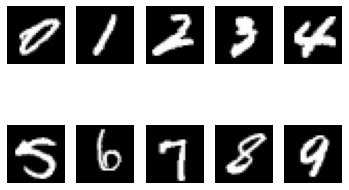

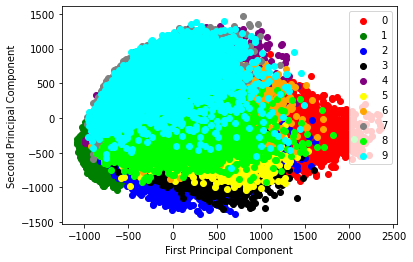

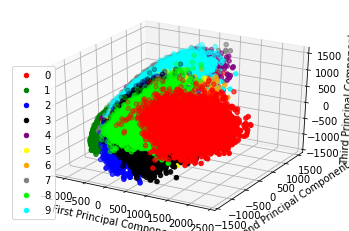

In [ ]:
import keras

x_train, y_train, _, _ = get_datasets('mnist')  
assert x_train.shape[0] == y_train.shape[0]		# number of samples
#assert Xtrain.shape[1] == 64   					# total pixel per a image
	
#y_train = keras.utils.to_categorical(y_train,10)
plotExampleImg("Show example:", x_train, y_train)	# for test only

# convert 64 components to 2 components
x_train = x_train.reshape(60000,784)
Xpca = getPCAvalues(x_train, 2)
assert Xpca.shape[0] == y_train.shape[0]
assert Xpca.shape[1] == 2

plotPCA2d(Xpca, y_train)
	
# convert 64 components to 3 components
Xpca = getPCAvalues(x_train, 3)
assert Xpca.shape[0] == y_train.shape[0]
assert Xpca.shape[1] == 3
plotPCA3d(Xpca, y_train)

# เปรียบเทียบกับ LDA (Linear Discriminant Analysis)


เปลี่ยนมาใช้ dataset ตัวนี้ดีกว่าจาก sklearn เพราะข้อมูลไม่เยอะดี (ภาพเล็ก)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

ดูตัวอย่างรูปตัวเลข

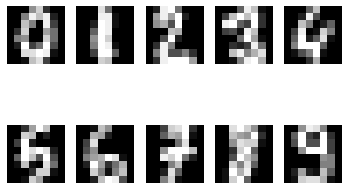

In [ ]:
plotExampleImg("Show example:", restoreImg(digits.data), digits.target)	# for test only

คำนวณ PCA กับ LDA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = digits.data
y = digits.target

# fit PCA
X_pca = PCA(n_components=2).fit_transform(X)
  
# fit LDA
X_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)

ยืมโค้ดพล็อตกราฟ

https://github.com/kevinzakka/nca/blob/master/examples/dim_reduct.py

In [ ]:
def plot(Xs, y, labels, save=None):
  fig, axes = plt.subplots(1, len(labels), figsize=(18, 4))
  for ax, X, lab in zip(axes, Xs, labels):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    ax.title.set_text(lab)    
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
  if save is not None:
    filename = "./assets/{}".format(save)
    plt.savefig(filename, format="png", dpi=300, bbox_inches='tight')  
  plt.show()

ดัดแปลงโค้ด

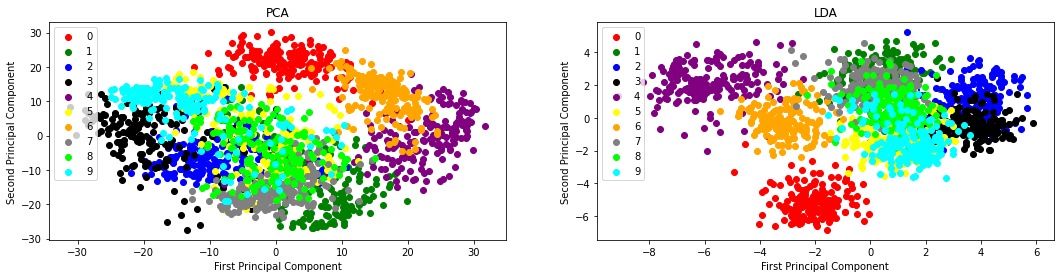

In [ ]:
def plot2(Xs, y_labels, labels):
  fig, axes = plt.subplots(1, len(labels), figsize=(18, 4))
  colors = ['red', 'green','blue', 'black', 'purple', 'yellow', 'orange', 'gray', 'lime', 'cyan']

  for ax, X, lab in zip(axes, Xs, labels):  
    for number in range(0, 10): # 0 to 9    
      
      XY = X[np.where(y_labels == number)[0]]      
      # seperate to x, y, z component
      x = XY[:, 0]
      y = XY[:, 1]
      
      ax.scatter(x, y, c=colors[number])	

    ax.title.set_text(lab)    
    ax.legend(np.arange(0,10), loc='upper left')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
 
  plt.show()

plot2([ X_pca, X_lda ], y, ["PCA", "LDA"])



# ฝากติดตาม

<img height="20px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2017/06/logo_facebook2.png" align="left" hspace="10px" vspace="0px">  https://www.facebook.com/programmerthai/

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/03/youtube.png" align="left" hspace="10px" vspace="3px">  https://www.youtube.com/channel/UCvhCKtG5cRE6K5--RJPql_w

<img height="14px" src="https://www.patanasongsivilai.com/blog/wp-content/uploads/2019/09/github-2.jpg" align="left" hspace="10px" vspace="3px">https://github.com/adminho/machine-learning

# ฝากประชาสัมพันธ์

In [ ]:
#@title หนังสือ AI (ปัญญาประดิษฐ์) ไม่ยาก เรียนรู้ได้ด้วยเลขม. ปลาย ราคา 295 บาท
%%HTML
<iframe src="https://www.facebook.com/plugins/post.php?href=https%3A%2F%2Fwww.facebook.com%2Fprogrammerthai%2Fphotos%2Fa.2410667485889755%2F2555677101388792%2F%3Ftype%3D3&width=500" width="500" height="588" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowTransparency="true" allow="encrypted-media"></iframe>